In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Data/combined_zpallagi.csv")
df.head(10)

id  year State  new_agi_stub   Returns    Single     Joint  Hd_of_Hshld  \
0   0  2012    AL           1.0  889920.0  490850.0  129070.0     256900.0   
1   1  2012    AL           2.0  491150.0  194370.0  159200.0     123350.0   
2   2  2012    AL           3.0  254280.0   68160.0  148960.0      31480.0   
3   3  2012    AL           4.0  160160.0   23020.0  126140.0       9030.0   
4   4  2012    AL           5.0  183320.0   15880.0  161260.0       4890.0   
5   5  2012    AL           6.0   44840.0    3420.0   40370.0        750.0   
6   6  2012    AK           1.0  128930.0   98750.0   13120.0      13880.0   
7   7  2012    AK           2.0   80860.0   44370.0   20740.0      12860.0   
8   8  2012    AK           3.0   51160.0   21860.0   22000.0       5840.0   
9   9  2012    AK           4.0   35010.0    9740.0   22250.0       2460.0   

      AGI_Amt  Total_Inc_Returns  Total_Inc_Amt  Std_Ded_Charity_Returns  \
0  11517112.0                NaN            NaN                      NaN   
1  17617800.0                NaN            NaN                      NaN   
2  15644666.0                NaN            NaN                      NaN   
3  13885434.0                NaN            NaN                      NaN   
4  24641055.0                NaN            NaN                      NaN   
5  21926706.0                NaN            NaN                      NaN   
6   1482918.0                NaN            NaN                      NaN   
7   2951291.0                NaN            NaN                      NaN   
8   3155691.0                NaN            NaN                      NaN   
9   3038502.0                NaN            NaN                      NaN   

   Std_Ded_Charity_Amt  Std_Ded_Returns  Std_Ded_Amt  Itemized_Ded_Returns  \
0                  NaN              NaN          NaN               62120.0   
1                  NaN              NaN          NaN              129230.0   
2                  NaN              NaN          NaN              112550.0   
3                  NaN              NaN          NaN               91800.0   
4                  NaN              NaN          NaN              141580.0   
5                  NaN              NaN          NaN               42720.0   
6                  NaN              NaN          NaN                4740.0   
7                  NaN              NaN          NaN               11230.0   
8                  NaN              NaN          NaN               16040.0   
9                  NaN              NaN          NaN               15280.0   

   Itemized_Ded_Amt  Charitable_Returns  Charitable_Amt  
0          850798.0             46490.0        121095.0  
1         1914481.0            103450.0        358997.0  
2         1914831.0             96530.0        404644.0  
3         1770415.0             81870.0        406140.0  
4         3383365.0            131170.0        849342.0  
5         2570907.0             40870.0        824648.0  
6           70709.0              2460.0          4791.0  
7          169387.0              6650.0         17280.0  
8          256775.0             10370.0         31973.0  
9          281076.0             10610.0         39831.0

# Rate of Tax Return Filing Status

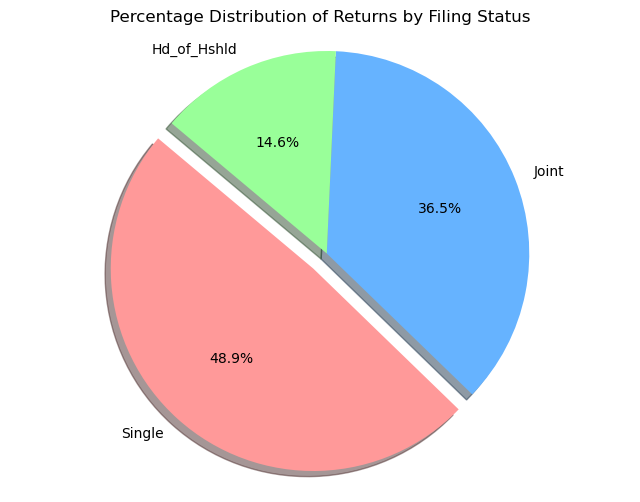

In [4]:
returns_sum = df.loc[:, 'Returns'].sum()
single_sum = df.loc[:, 'Single'].sum()
joint_sum = df.loc[:, 'Joint'].sum()
hd_of_Hshld_sum = df.loc[:, 'Hd_of_Hshld'].sum()

single_percentage = (single_sum / returns_sum) * 100
joint_percentage = (joint_sum / returns_sum) * 100
hd_of_hshld_percentage = (hd_of_Hshld_sum / returns_sum) * 100

labels = ['Single', 'Joint', 'Hd_of_Hshld']
sizes = [single_percentage, joint_percentage, hd_of_hshld_percentage]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Percentage Distribution of Returns by Filing Status')
plt.show()

# Rate of Tax Returns with Itemized Deduction vs Standard Deduction

In [5]:
filtered_data = pd.read_csv('Data/combined_zpallagi.csv')
filtered_data['year'] = filtered_data['year'].astype(int)

state_year_itemized_aggregated_adjusted = filtered_data.groupby(['State', 'year']).agg({
    'Itemized_Ded_Returns': 'sum',
    'Returns': 'sum'
}).reset_index()

state_year_itemized_aggregated_adjusted['Itemized_Ded_to_Returns_Percent'] = (
    state_year_itemized_aggregated_adjusted['Returns'] / state_year_itemized_aggregated_adjusted['Itemized_Ded_Returns']
)

state_year_itemized_aggregated_adjusted

State  year  Itemized_Ded_Returns   Returns  \
0      AK  2012               87510.0  358990.0   
1      AK  2013               82370.0  355150.0   
2      AK  2014               79760.0  357640.0   
3      AK  2015               80270.0  358650.0   
4      AK  2016               79280.0  344240.0   
..    ...   ...                   ...       ...   
505    WY  2017               59570.0  266070.0   
506    WY  2018               16700.0  268140.0   
507    WY  2019               16590.0  274980.0   
508    WY  2020               14470.0  276680.0   
509    WY  2021               13980.0  274770.0   

     Itemized_Ded_to_Returns_Percent  
0                           4.102274  
1                           4.311643  
2                           4.483952  
3                           4.468045  
4                           4.342079  
..                               ...  
505                         4.466510  
506                        16.056287  
507                        16.575045  
508                        19.120940  
509                        19.654506  

[510 rows x 5 columns]

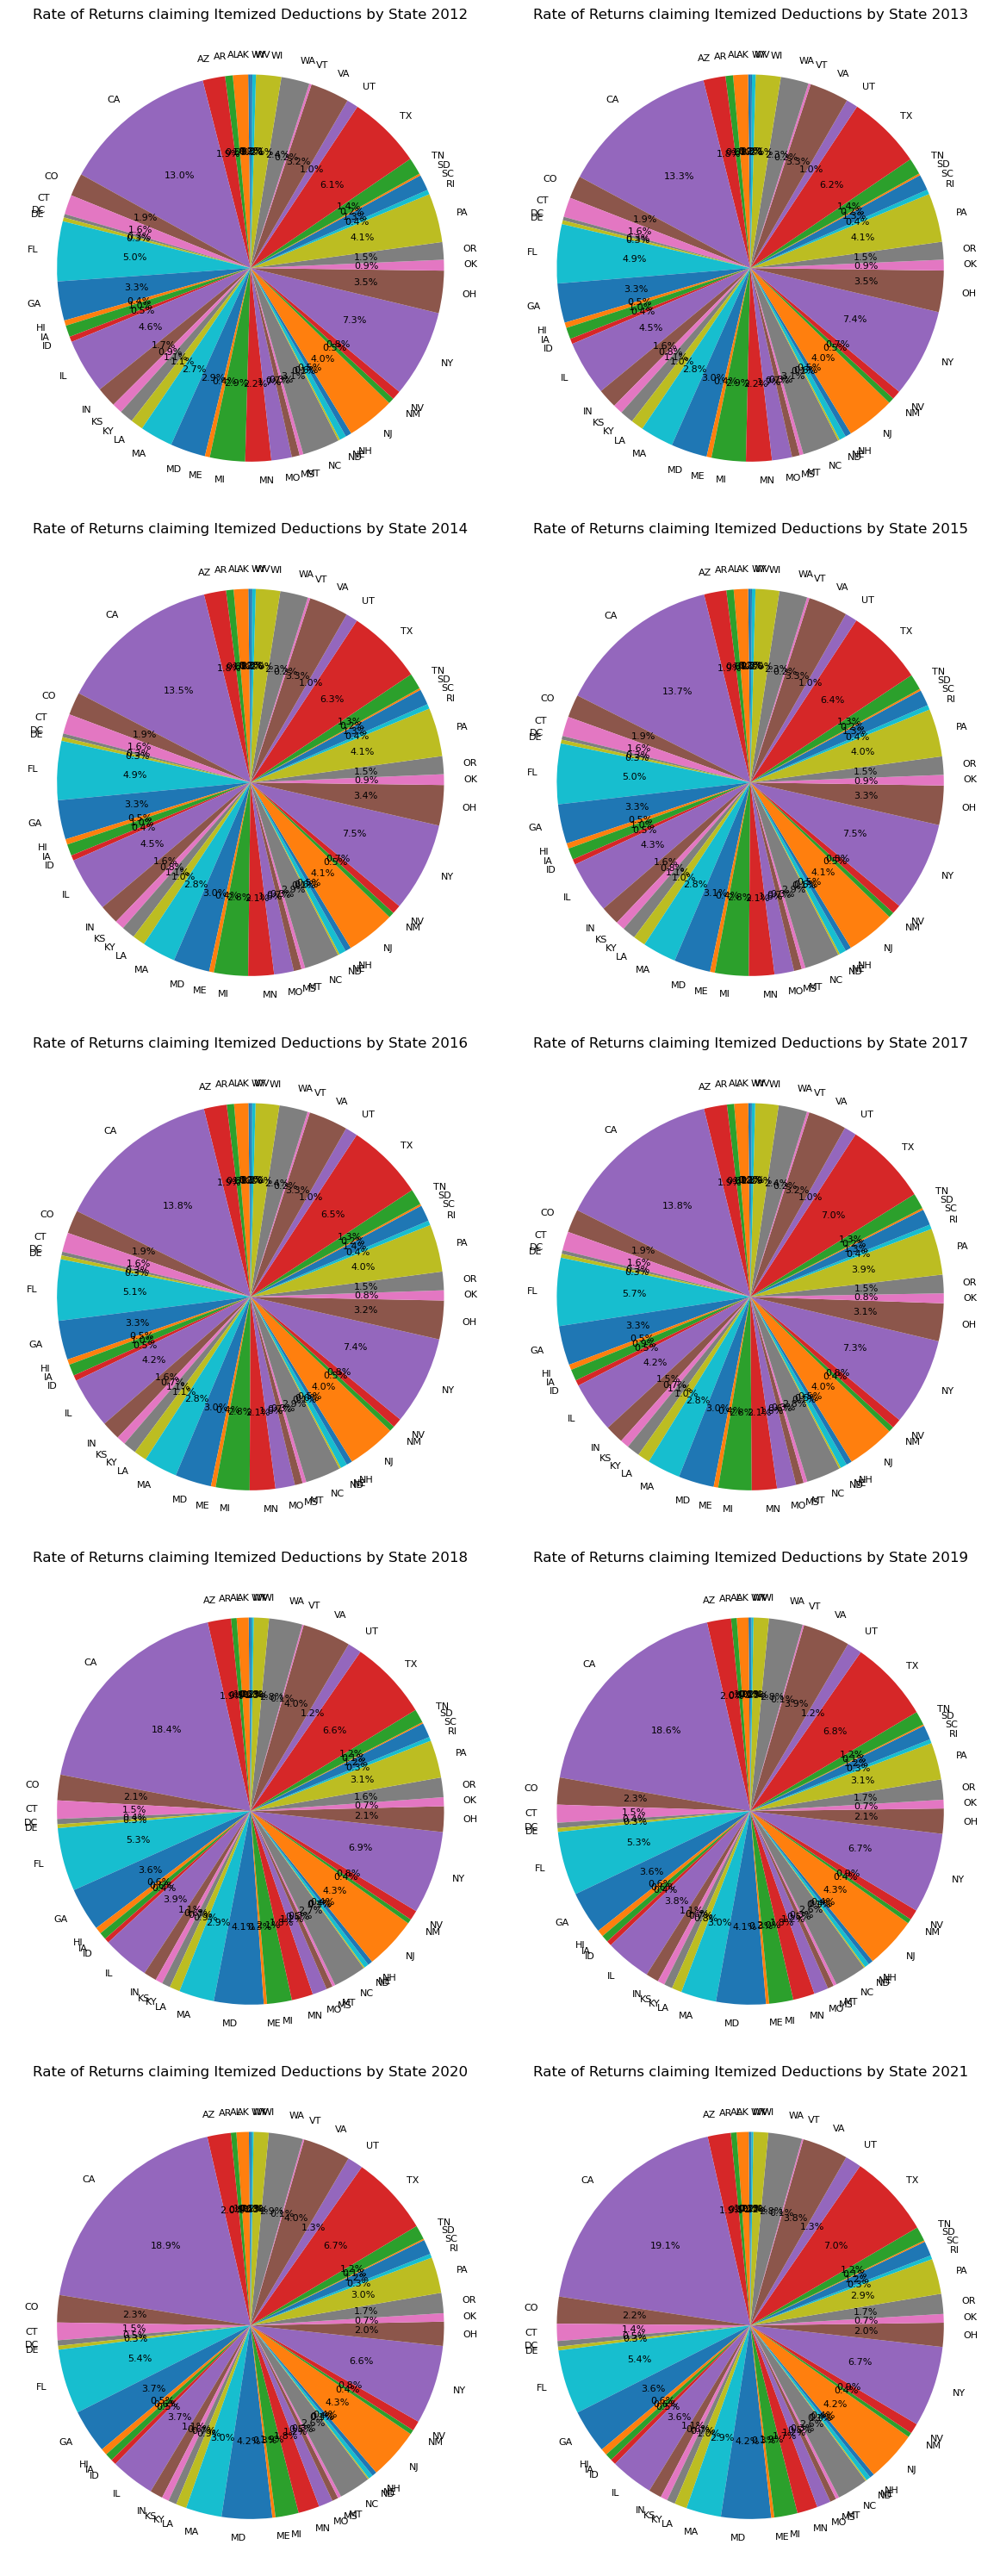

In [23]:
state_year_itemized_aggregated = filtered_data.groupby(['State', 'year']).agg({
    'Itemized_Ded_Returns': 'sum',
    'Returns': 'sum'
}).reset_index()

years = state_year_itemized_aggregated['year'].unique()

num_rows = len(years) // 2 + len(years) % 2  
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))  
axes = axes.flatten() 

for i, year in enumerate(years):
    year_data = state_year_itemized_aggregated[state_year_itemized_aggregated['year'] == year]
    
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(year_data['Itemized_Ded_Returns'], labels=year_data['State'], autopct='%1.1f%%', startangle=90)
    
    for autotext in autotexts:
        autotext.set_size(8)  
    for text in texts:
        text.set_size(8) 
    
    ax.set_title(f'Rate of Returns claiming Itemized Deductions by State {year}', fontsize=12)

if len(years) % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

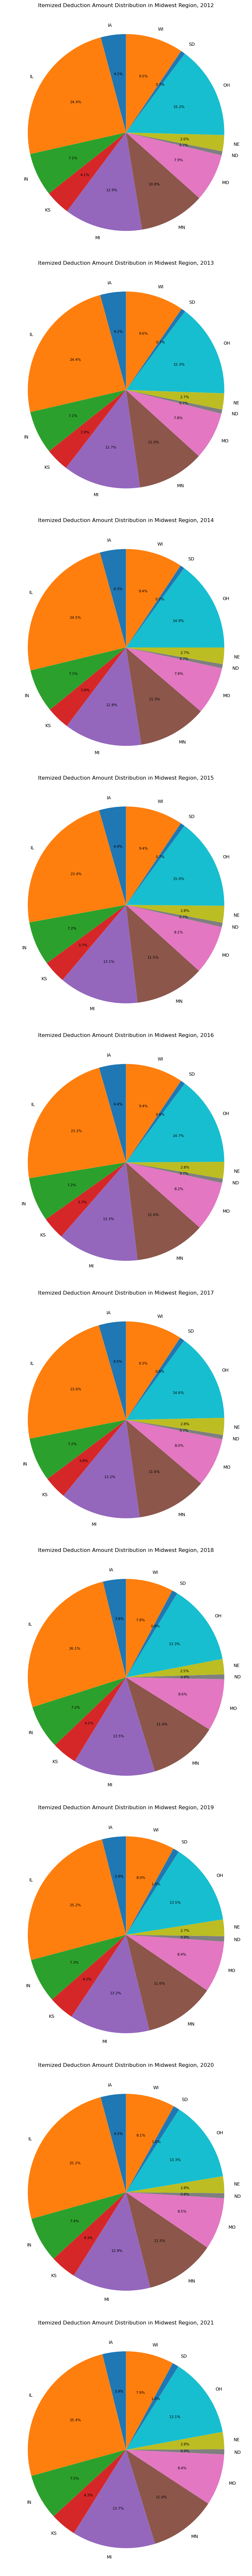

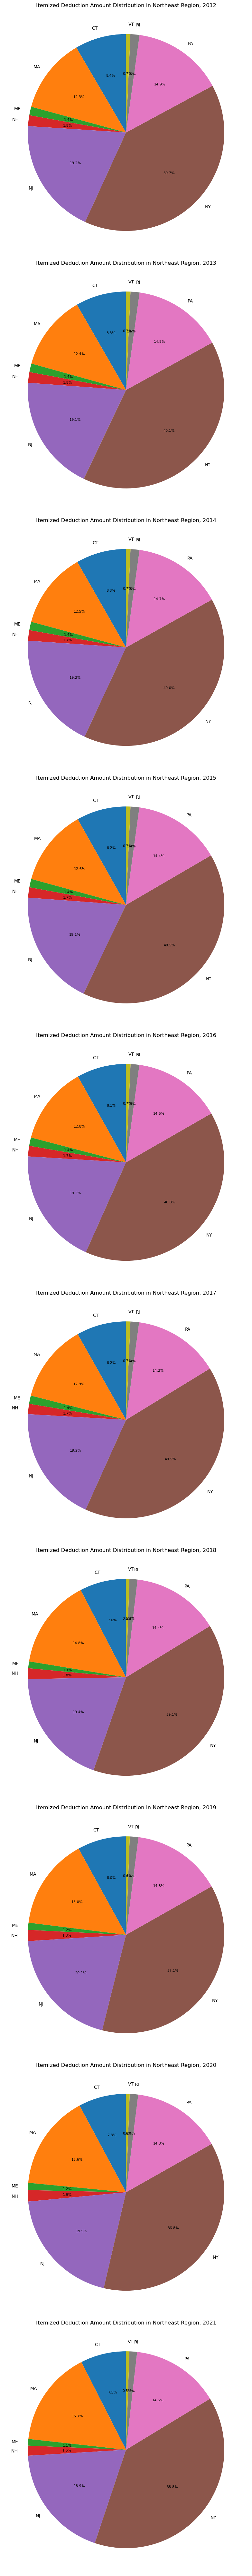

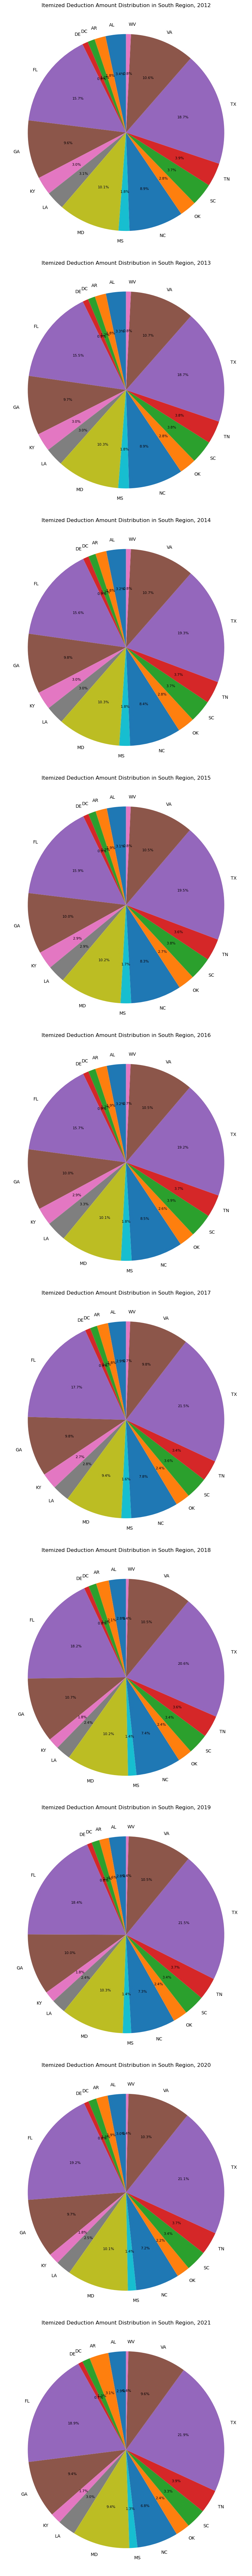

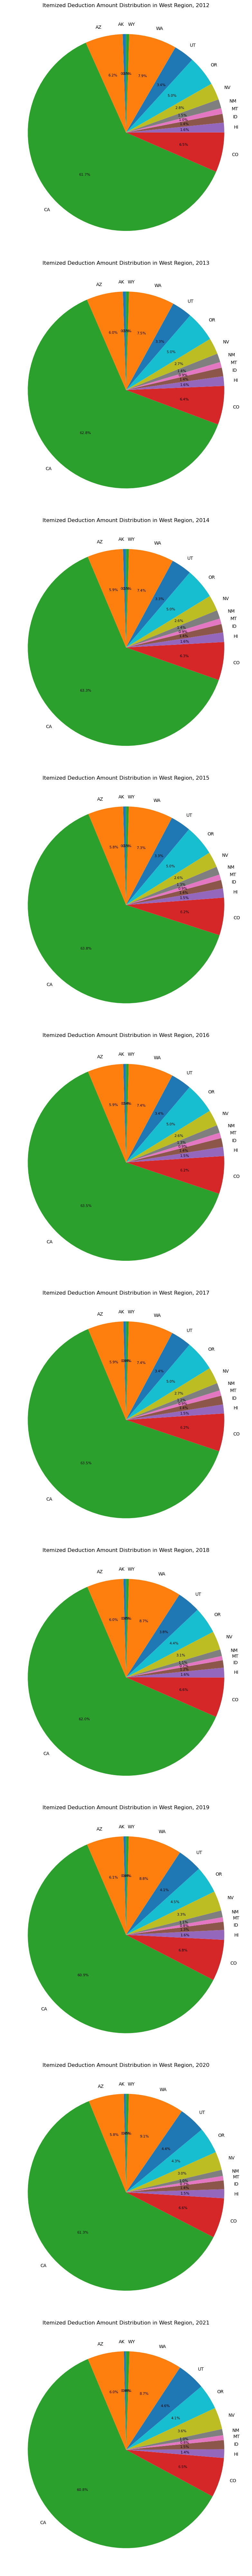

In [7]:

region_mapping = {
    'Northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
    'Midwest': ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'MI', 'IN', 'OH'],
    'South': ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'MS', 'AL', 'OK', 'TX', 'AR', 'LA'],
    'West': ['ID', 'MT', 'WY', 'NV', 'UT', 'CO', 'AZ', 'NM', 'AK', 'WA', 'OR', 'CA', 'HI']
}

filtered_data['Region'] = filtered_data['State'].map(lambda x: next((k for k, v in region_mapping.items() if x in v), 'Other'))

region_state_year_aggregated = filtered_data.groupby(['Region', 'State', 'year']).agg({
    'Itemized_Ded_Amt': 'sum',
    'Returns': 'sum'
}).reset_index()


unique_regions = region_state_year_aggregated['Region'].unique()
unique_years = region_state_year_aggregated['year'].unique()

for region in unique_regions:
    fig, axes = plt.subplots(nrows=len(unique_years), figsize=(10, 8 * len(unique_years)))
    axes = axes.flatten() if len(unique_years) > 1 else [axes]

    for i, year in enumerate(unique_years):
        regional_data = region_state_year_aggregated[(region_state_year_aggregated['Region'] == region) & (region_state_year_aggregated['year'] == year)]
        
        ax = axes[i]
        wedges, texts, autotexts = ax.pie(regional_data['Itemized_Ded_Amt'], labels=regional_data['State'], autopct='%1.1f%%', startangle=90)
        
        for autotext in autotexts:
            autotext.set_size(8)

        ax.set_title(f'Itemized Deduction Amount Distribution in {region} Region, {year}')

    plt.tight_layout()
    plt.show()

# Rate of Tax Returns claiming Charitable Contributions

In [9]:
df_charitable_returns = df[['year','State', 'new_agi_stub','Returns', 'Single',
                            'Joint', 'Hd_of_Hshld', 'Charitable_Returns']]
df_charitable_returns

year State  new_agi_stub   Returns    Single     Joint  Hd_of_Hshld  \
0     2012    AL           1.0  889920.0  490850.0  129070.0     256900.0   
1     2012    AL           2.0  491150.0  194370.0  159200.0     123350.0   
2     2012    AL           3.0  254280.0   68160.0  148960.0      31480.0   
3     2012    AL           4.0  160160.0   23020.0  126140.0       9030.0   
4     2012    AL           5.0  183320.0   15880.0  161260.0       4890.0   
...    ...   ...           ...       ...       ...       ...          ...   
3055  2021    WY           2.0   62380.0   37690.0   13720.0       9640.0   
3056  2021    WY           3.0   41880.0   19230.0   17470.0       4140.0   
3057  2021    WY           4.0   29940.0    8390.0   18900.0       2000.0   
3058  2021    WY           5.0   48470.0    6940.0   39750.0       1270.0   
3059  2021    WY           6.0   16510.0    2320.0   13250.0         90.0   

      Charitable_Returns  
0                46490.0  
1               103450.0  
2                96530.0  
3                81870.0  
4               131170.0  
...                  ...  
3055               880.0  
3056              1170.0  
3057               820.0  
3058              3170.0  
3059              4550.0  

[3060 rows x 8 columns]

In [10]:
df_charitable_returns['Rate_of_Returns_claiming_Charitable_Contribution'] = df_charitable_returns['Charitable_Returns'] / df['Returns']*100
result = df_charitable_returns.groupby(['State', 'new_agi_stub'])['Rate_of_Returns_claiming_Charitable_Contribution'].mean().reset_index()

df_charitable_returns.head(12)

year State  new_agi_stub   Returns    Single     Joint  Hd_of_Hshld  \
0   2012    AL           1.0  889920.0  490850.0  129070.0     256900.0   
1   2012    AL           2.0  491150.0  194370.0  159200.0     123350.0   
2   2012    AL           3.0  254280.0   68160.0  148960.0      31480.0   
3   2012    AL           4.0  160160.0   23020.0  126140.0       9030.0   
4   2012    AL           5.0  183320.0   15880.0  161260.0       4890.0   
5   2012    AL           6.0   44840.0    3420.0   40370.0        750.0   
6   2012    AK           1.0  128930.0   98750.0   13120.0      13880.0   
7   2012    AK           2.0   80860.0   44370.0   20740.0      12860.0   
8   2012    AK           3.0   51160.0   21860.0   22000.0       5840.0   
9   2012    AK           4.0   35010.0    9740.0   22250.0       2460.0   
10  2012    AK           5.0   50730.0    7090.0   41550.0       1730.0   
11  2012    AK           6.0   12300.0    1340.0   10640.0        300.0   

    Charitable_Returns  Rate_of_Returns_claiming_Charitable_Contribution  
0              46490.0                                          5.224065  
1             103450.0                                         21.062812  
2              96530.0                                         37.962089  
3              81870.0                                         51.117632  
4             131170.0                                         71.552477  
5              40870.0                                         91.146298  
6               2460.0                                          1.908012  
7               6650.0                                          8.224091  
8              10370.0                                         20.269742  
9              10610.0                                         30.305627  
10             23770.0                                         46.855904  
11              8760.0                                         71.219512

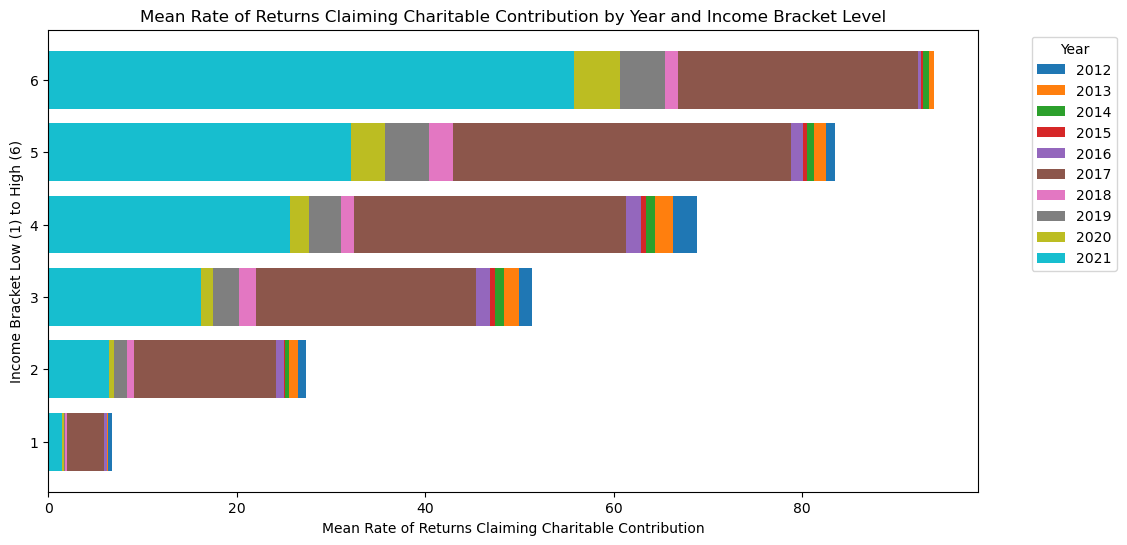

In [11]:
plt.figure(figsize=(12, 6))
for state, group in df_charitable_returns.groupby('year'):
    plt.barh(group['new_agi_stub'], group['Rate_of_Returns_claiming_Charitable_Contribution'], label=state)

plt.ylabel('Income Bracket Low (1) to High (6)')
plt.xlabel('Mean Rate of Returns Claiming Charitable Contribution')
plt.title('Mean Rate of Returns Claiming Charitable Contribution by Year and Income Bracket Level')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Charitable Contribution claimed on Tax Returns 2012-2021

In [17]:
all_data_df = df

def by_thousand(df):
    
    columns_to_multiply = ['AGI_Amt', 'Std_Ded_Charity_Amt', 'Std_Ded_Amt', 'Itemized_Ded_Amt', 'Charitable_Amt']
    
    try:
        df[columns_to_multiply] = df[columns_to_multiply] * 1000
    except KeyError as e:
        missing_columns = [col for col in columns_to_multiply if col not in df.columns]
        print(f"Skipping non-existent columns: {missing_columns}")

    return df

In [18]:
all_data_adj = by_thousand(all_data_df)

In [19]:
#get rid of columns
columns_to_keep = ['id', 'year', 'State', 'new_agi_stub', 'Returns', 'Single', 'Joint',
       'Hd_of_Hshld', 'AGI_Amt','Itemized_Ded_Amt',
       'Charitable_Returns', 'Charitable_Amt']
plotable_df = all_data_adj[columns_to_keep]


In [20]:
grouped_df = plotable_df.groupby('year')['Charitable_Amt'].sum().reset_index()

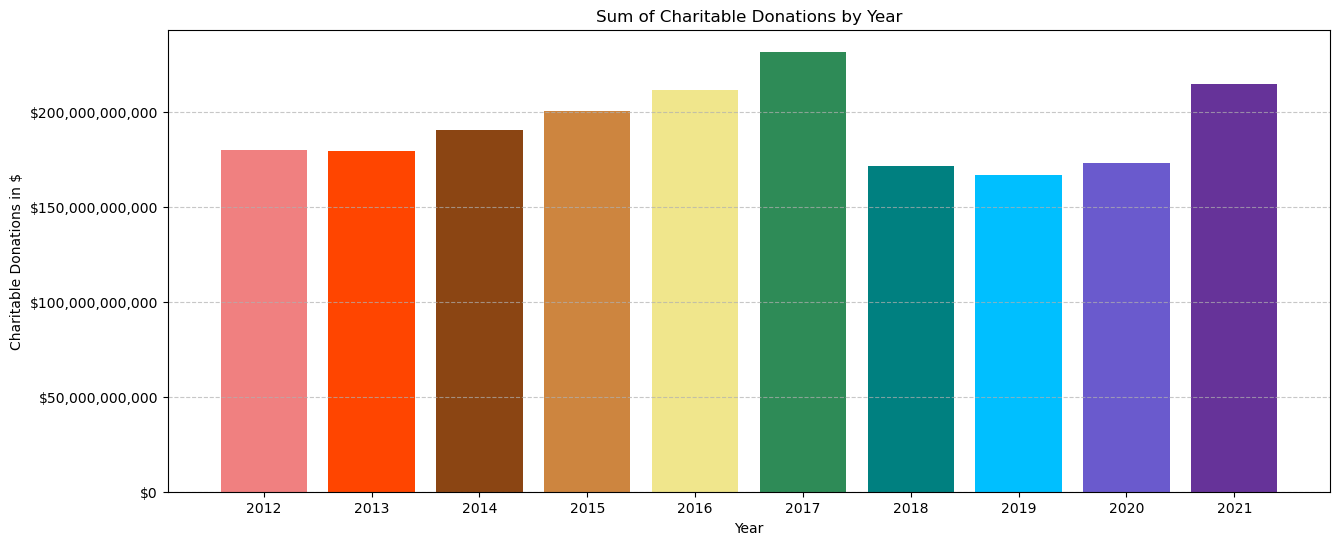

<Figure size 1600x600 with 0 Axes>

In [21]:
colors = ['lightcoral','orangered','saddlebrown','peru','khaki','seagreen','teal','deepskyblue','slateblue','rebeccapurple']
labels = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
plt.figure(figsize=(15, 6))
plt.bar(grouped_df['year'].astype(str), grouped_df['Charitable_Amt'], color= colors)
plt.xlabel('Year')
plt.ylabel('Charitable Donations in $')
plt.title('Sum of Charitable Donations by Year')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=.7)
plt.figure(figsize=(16, 6))
plt.show()

In [49]:
def calculate_average_charitable_contributions(df):

    # Attempt to process standard deduction returns
   try:
      df['Avg_Char_Amt_St.'] = (df['Charitable_Returns']/ df['Charitable_Amt'])
    
      std_ded_avg = std_ded_df.groupby(['State', 'AGI_new_stub'])['Charitable_Amt'].mean().reset_index()
      std_ded_avg['Deduction_Type'] = 'Standard'  # Add column for deduction type
      std_ded_avg['Average_Charitable_Contribution'] = std_ded_avg['Charitable_Amt']  # Add column for average contribution
   except KeyError:
      print("Warning: Standard deduction columns not found. Skipping standard deduction calculations.")
      std_ded_avg = pd.DataFrame()  # Create an empty DataFrame for standard deduction
    
    # Attempt to process itemized deduction returns
   try:
        itemized_ded_df = df[df['Itemized_Ded_Returns'] > 0]  # Filter for itemized deduction returns
        itemized_ded_avg = itemized_ded_df.groupby(['State', 'AGI_new_stub'])['Charitable_Amt'].mean().reset_index()
        itemized_ded_avg['Deduction_Type'] = 'Itemized'  # Add column for deduction type
        itemized_ded_avg['Average_Charitable_Contribution'] = itemized_ded_avg['Charitable_Amt']  # Add column for average contribution
   except KeyError:
        print("Warning: Itemized deduction columns not found. Skipping itemized deduction calculations.")
        itemized_ded_avg = pd.DataFrame()  # Create an empty DataFrame for itemized deduction
#----------------------------
#    Concatenate results while filtering out empty DataFrames
   results = []
   if not std_ded_avg.empty:
        results.append(std_ded_avg)
   if not itemized_ded_avg.empty:
        results.append(itemized_ded_avg)
    
   if results:
       avg_charitable_contributions = pd.concat(results, ignore_index=True)
   else:
        avg_charitable_contributions = pd.DataFrame()  # Return empty DataFrame if no valid results
    
   return avg_charitable_contributions